In [73]:
from os import listdir
import pandas as pd 
import re
from collections import Counter
from nltk import tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from stylometry.stylometry.extract import *

In [74]:
def load_data_to_pandas():
    data = {}
    for directory_name in listdir('articles/'):
        for file_name in listdir('articles/'+directory_name):
            text = ''
            file = open('articles/'+directory_name+"/"+file_name, "r")
            for line in file:
                text += line
            data[directory_name+"/"+file_name] = text
    data_frame = pd.DataFrame(data.items(), columns=['Source', 'Article'])
    return data_frame
df = load_data_to_pandas()
df['Class'] = df['Source'].apply(lambda x: 'YP' if 'YP' in x else 'HQ')

In [80]:
def remove_quotes(article):
    quotes = re.findall("\“.*?\”", article)
    quotes2 = re.findall("\".*?\"", article)
    for quote in quotes:
        article = article.replace(quote, '')
    for quote in quotes2:
        article = article.replace(quote, '')
    return article

def alpha_chars_ratio(article):
    count = 0 
    total = 0
    for char in article:
        total += 1
        if char.isalpha():
            count += 1
    return count/total

def digit_chars_ratio(article):
    count = 0
    total = 0
    for char in article:
        total += 1
        if char.isdigit():
            count += 1
    return count/total

def upper_chars_ratio(article):
    count = 0 
    total = 0 
    for char in article:
        total += 1
        if char.isupper():
            count += 1
    return count/total

def white_chars_ratio(article):
    count = 0 
    total = 0 
    for char in article:
        total += 1
        if char.isspace():
            count += 1
    return count/total

def counter_of_words(article):
    article = article.lower()
    article = re.sub("[^\w ]", "", article)
    words = article.split(" ")
    return Counter(words)

def total_number_of_words(article):
    counter = counter_of_words(article)
    total = 0
    for item, value in counter.items():
        total += value
    return total

def size_of_vocabulary(article):
    counter = counter_of_words(article)
    return len(list(counter.keys()))

def type_token_ratio(article): # better solution 
    return size_of_vocabulary(article)/total_number_of_words(article)

# words occuring once
def hapax_legomena(article):
    counter = counter_of_words(article)
    total = 0 
    for item, value in counter.items():
        if value == 1:
            total += 1
    return total

def hapax_dislegomena(article):
    counter = counter_of_words(article)
    total = 0 
    for item, value in counter.items():
        if value == 2:
            total += 1
    return total

def average_word_length(article): # there is better solution
    counter = counter_of_words(article)
    total_length = 0
    size = len(list(counter.keys()))
    for word in counter.keys():
        total_length += len(word)
    return total_length/size

def average_sentence_char_length(article):
    sentences = tokenize.sent_tokenize(article)
    size = len(sentences)
    total = 0 
    for sentence in sentences:
        for char in sentence:
            total += 1
    return total/size

def average_sentence_word_length(article):
    sentences = tokenize.sent_tokenize(article)
    size = len(sentences)
    total = 0
    for sentence in sentences:
        counter = counter_of_words(sentence)
        for item, value in counter.items():
            total += value
    return total/size

def lexical_diversity(article):
    instance = StyloDocument(text=article)
    return instance.type_token_ratio()

def mean_word_length(article):
    instance = StyloDocument(text=article)
    return instance.mean_word_len()

def mean_paragraph_len(article):
    instance = StyloDocument(text=article)
    return instance.mean_paragraph_len()

def exclamation_mark_rate(article):
    instance = StyloDocument(text=article)
    return instance.term_per_thousand('!')

def question_mark_rate(article):
    instance = StyloDocument(text=article)
    return instance.term_per_thousand('?')

def number_of_adverbs(article):
    text = nltk.word_tokenize(article)
    fdist = FreqDist(article)
    count = 0
    for tag in nltk.pos_tag(text):
        if tag[1] == 'RB':
            count += 1
    return count/fdist.N()

def number_of_adjectives(article):
    text = nltk.word_tokenize(article)
    fdist = FreqDist(article)
    count = 0
    for tag in nltk.pos_tag(text):
        if tag[1] == 'JJ':
            count += 1
    return count/fdist.N()

def adj_adv(article):
    text = nltk.word_tokenize(article)
    fdist = FreqDist(article)
    count = 0
    for tag in nltk.pos_tag(text):
        if tag[1] == 'JJ' or tag[1] =='RB':
            count += 1
    return count/fdist.N()

def number_of_quotes(article):
    result = re.findall("\“.*?\”", article)
    diff_result = re.findall("\".*?\"", article)
    return len(result)+len(diff_result)

def number_of_commas(article):
    



In [83]:
df['removed-quotes'] = df['Article'].apply(remove_quotes)
df['quotes-rate'] = df['Article'].apply(number_of_quotes)
df['alpha-chars-ratio'] = df['removed-quotes'].apply(alpha_chars_ratio)
df['digit-chars-ratio'] = df['removed-quotes'].apply(digit_chars_ratio)
df['upper-chars-ratio'] = df['removed-quotes'].apply(upper_chars_ratio)
df['white-chars-ratio'] = df['removed-quotes'].apply(white_chars_ratio)
df['number-of-words'] = df['removed-quotes'].apply(total_number_of_words)
df['size-of-vocabulary'] = df['removed-quotes'].apply(size_of_vocabulary)
df['type-token-ratio'] = df['removed-quotes'].apply(lexical_diversity)
df['hapax-legomena'] = df['removed-quotes'].apply(hapax_legomena)
df['hapax-dislegomena'] = df['removed-quotes'].apply(hapax_dislegomena)
df['average-word-length'] = df['removed-quotes'].apply(mean_word_length)
df['average-sentence-char-length'] = df['removed-quotes'].apply(average_sentence_char_length)
df['average-sentence-word-length'] = df['removed-quotes'].apply(average_sentence_word_length)
df['average-paragraph-length'] = df['removed-quotes'].apply(mean_paragraph_len)
df['exclamation_mark_rate'] = df['removed-quotes'].apply(exclamation_mark_rate)
df['question-mark-rate'] = df['removed-quotes'].apply(question_mark_rate)
df['adverbs-rate'] = df['removed-quotes'].apply(number_of_adverbs)
df['adjectives-rate'] = df['removed-quotes'].apply(number_of_adjectives)
df['adjectivs-adverbs-rate'] = df['removed-quotes'].apply(adj_adv)


In [84]:
df

,Source,Article,Class,alpha-chars-ratio,digit-chars-ratio,upper-chars-ratio,white-chars-ratio,number-of-words,size-of-vocabulary,type-token-ratio,...,average-sentence-char-length,average-sentence-word-length,average-paragraph-length,exclamation_mark_rate,question-mark-rate,adverbs-rate,adjectives-rate,quotes-rate,adjectivs-adverbs-rate,removed-quotes
0,kanye/YPthe sun,A SOBBING Kanye West revealed he stopped Kim K...,YP,0.775218,0.012289,0.029186,0.187404,320,195,54.838710,...,120.000000,20.812500,16.550000,0.0,0.000000,0.006144,0.011777,12,0.017921,A SOBBING Kanye West revealed he stopped Kim K...
1,kanye/HQguardian,Rapper’s rambling and emotional address – whi...,HQ,0.795803,0.003331,0.017655,0.180213,506,274,49.649123,...,123.083333,21.333333,31.875000,0.0,0.000000,0.004997,0.011326,16,0.016322,Rapper’s rambling and emotional address – whi...
2,kanye/HQbbc,Kanye West has officially launched his campaig...,HQ,0.785953,0.009365,0.025084,0.179933,486,278,51.428571,...,112.846154,19.384615,21.826087,0.0,5.357143,0.004682,0.012709,14,0.017391,Kanye West has officially launched his campaig...
3,kanye/HQwashington post,"COLUMBIA, S.C. — Rapper Kanye West, in his fir...",HQ,0.810364,0.005513,0.025358,0.162073,278,183,57.716049,...,127.857143,20.285714,31.444444,0.0,0.000000,0.003308,0.010474,2,0.013782,"COLUMBIA, S.C. — Rapper Kanye West, in his fir..."
4,kanye/YPdaily mail,\nUS rapper Kanye West broke down in tears on...,YP,0.787055,0.005825,0.031715,0.181877,258,167,58.163265,...,152.600000,26.500000,21.833333,0.0,0.000000,0.006472,0.009709,6,0.016181,\nUS rapper Kanye West broke down in tears on...
5,kanye/YPny post,\nKanye West — who claims to be running for p...,YP,0.780520,0.013342,0.028019,0.182121,248,155,57.295374,...,134.181818,23.090909,19.153846,0.0,0.000000,0.005337,0.008672,9,0.014009,\nKanye West — who claims to be running for p...
6,kanye/YPirish post,KANYE WEST officially launched his bid to beco...,YP,0.786900,0.007627,0.030507,0.182144,366,236,62.593516,...,136.187500,22.625000,16.714286,0.0,0.000000,0.009421,0.013010,15,0.022432,KANYE WEST officially launched his bid to beco...
7,kanye/HQdw,US rapper Kanye West has held his first electi...,HQ,0.815586,0.001785,0.020226,0.161214,256,182,63.698630,...,110.333333,17.333333,32.375000,0.0,0.000000,0.005354,0.013682,3,0.019036,US rapper Kanye West has held his first electi...
8,hamilton/YPthe sun,WHAT ARE LEW DOING? Lewis Hamilton slammed by ...,YP,0.788196,0.004109,0.038849,0.185282,425,264,58.110883,...,155.176471,25.882353,18.291667,0.0,2.053388,0.004856,0.011580,21,0.016436,WHAT ARE LEW DOING? Lewis Hamilton slammed by ...
9,hamilton/HQbbc,Coronavirus: Lewis Hamilton deletes vaccine co...,HQ,0.801660,0.004149,0.026971,0.174274,382,190,45.581395,...,112.904762,19.047619,20.736842,0.0,6.976744,0.002490,0.007469,10,0.009959,Coronavirus: Lewis Hamilton deletes vaccine co...


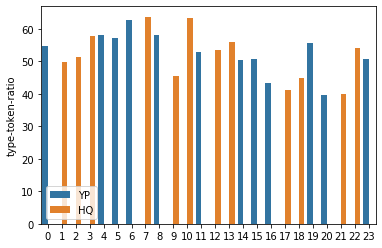

In [95]:
sns.barplot(df.index, df['type-token-ratio'], hue=df.Class)
plt.legend(loc='lower left')


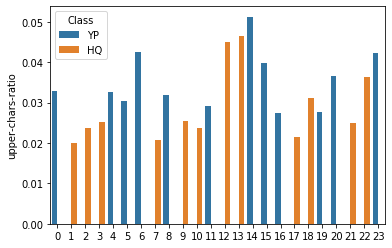

In [7]:
sns.barplot(df.index, df['upper-chars-ratio'], hue=df.Class)

In [10]:
test1 = StyloDocument(file_name='articles/kanye/YPthe sun')

In [11]:
test1.text_output()


##############################################

Name:  articles/kanye/YPthe sun

>>> Phraseology Analysis <<<

Lexical diversity        : 49.04679376083189
Mean Word Length         : 5.148409893992933
Mean Sentence Length     : 17.59259259259259
STDEV Sentence Length    : 10.750570214883037
Mean paragraph Length    : 19.791666666666668
Document Length          : 2689

>>> Punctuation Analysis (per 1000 tokens) <<<

Commas                   : 45.060658578856156
Semicolons               : 0.0
Quotations               : 0.0
Exclamations             : 1.733102253032929
Colons                   : 8.665511265164644
Hyphens                  : 3.466204506065858
Double Hyphens           : 0.0

>>> Lexical Usage Analysis (per 1000 tokens) <<<

and                      : 12.131715771230503
but                      : 3.466204506065858
however                  : 0.0
if                       : 1.733102253032929
that                     : 6.932409012131716
more                     : 0.0
must         

In [103]:
df_for_saving = df.drop('Article', axis=1).drop('removed-quotes', axis=1).drop('Source', axis=1)

In [105]:
df_for_saving

,Class,alpha-chars-ratio,digit-chars-ratio,upper-chars-ratio,white-chars-ratio,number-of-words,size-of-vocabulary,type-token-ratio,hapax-legomena,hapax-dislegomena,average-word-length,average-sentence-char-length,average-sentence-word-length,average-paragraph-length,exclamation_mark_rate,question-mark-rate,adverbs-rate,adjectives-rate,quotes-rate,adjectivs-adverbs-rate
0,YP,0.775218,0.012289,0.029186,0.187404,320,195,54.838710,153,21,5.470588,120.000000,20.812500,16.550000,0.0,0.000000,0.006144,0.011777,12,0.017921
1,HQ,0.795803,0.003331,0.017655,0.180213,506,274,49.649123,212,24,5.678445,123.083333,21.333333,31.875000,0.0,0.000000,0.004997,0.011326,16,0.016322
2,HQ,0.785953,0.009365,0.025084,0.179933,486,278,51.428571,214,33,5.729167,112.846154,19.384615,21.826087,0.0,5.357143,0.004682,0.012709,14,0.017391
3,HQ,0.810364,0.005513,0.025358,0.162073,278,183,57.716049,139,29,6.021390,127.857143,20.285714,31.444444,0.0,0.000000,0.003308,0.010474,2,0.013782
4,YP,0.787055,0.005825,0.031715,0.181877,258,167,58.163265,130,19,5.426901,152.600000,26.500000,21.833333,0.0,0.000000,0.006472,0.009709,6,0.016181
5,YP,0.780520,0.013342,0.028019,0.182121,248,155,57.295374,116,26,5.559006,134.181818,23.090909,19.153846,0.0,0.000000,0.005337,0.008672,9,0.014009
6,YP,0.786900,0.007627,0.030507,0.182144,366,236,62.593516,197,20,5.681275,136.187500,22.625000,16.714286,0.0,0.000000,0.009421,0.013010,15,0.022432
7,HQ,0.815586,0.001785,0.020226,0.161214,256,182,63.698630,149,19,5.913978,110.333333,17.333333,32.375000,0.0,0.000000,0.005354,0.013682,3,0.019036
8,YP,0.788196,0.004109,0.038849,0.185282,425,264,58.110883,211,28,5.477032,155.176471,25.882353,18.291667,0.0,2.053388,0.004856,0.011580,21,0.016436
9,HQ,0.801660,0.004149,0.026971,0.174274,382,190,45.581395,133,27,5.668367,112.904762,19.047619,20.736842,0.0,6.976744,0.002490,0.007469,10,0.009959
